# Visual Computing: Workshop 0

## Library Imports



In [18]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio
from IPython.display import Image

## Defining the Square

In [19]:
# Define a square shape
shape = np.array([[0, 0],
                  [1, 0],
                  [1, 1],
                  [0, 1]])

# Add a column of ones for affine transformations
shape = np.hstack((shape, np.ones((shape.shape[0], 1))))

# Print the shape array
print(shape)

[[0. 0. 1.]
 [1. 0. 1.]
 [1. 1. 1.]
 [0. 1. 1.]]


## Transformation Functions

In [20]:
def translate(tx, ty):
    """Returns a 3x3 translation matrix."""
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])

def rotate(theta):
    """Returns a 3x3 rotation matrix for angle theta in radians."""
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s, 0],
                     [s, c, 0],
                     [0, 0, 1]])

def scale(sx, sy):
    """Returns a 3x3 scaling matrix."""
    return np.array([[sx, 0, 0],
                     [0, sy, 0],
                     [0, 0, 1]])

## Animation Loop

In [21]:
# 1. Determine the total number of frames for the animation.
total_frames = 100

# 2. Initialize an empty list to store the filenames of the saved frames.
filenames = []

# 3. Start a loop that iterates over the desired number of frames.
for i in range(total_frames):
    # 4. Inside the loop, calculate the current transformation parameters
    t = i / (total_frames - 1)  # Normalized time from 0 to 1

    # Smooth transition for translation
    tx = 2 * np.sin(2 * np.pi * t)
    ty = 1 * np.cos(2 * np.pi * t)

    # Gradual rotation
    theta = 2 * np.pi * t

    # Scaling that oscillates
    sx = 1 + 0.5 * np.sin(4 * np.pi * t)
    sy = 1 + 0.5 * np.cos(4 * np.pi * t)

    # 5. Apply the transformation functions to generate the transformation matrices.
    translation_matrix = translate(tx, ty)
    rotation_matrix = rotate(theta)
    scaling_matrix = scale(sx, sy)

    # 6. Combine the transformation matrices by multiplying them in the desired order.
    composite_matrix = translation_matrix @ rotation_matrix @ scaling_matrix

    # 7. Apply the composite transformation matrix to the initial shape array.
    transformed_shape = (composite_matrix @ shape.T).T[:, :2]

    # Plot the transformed shape
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(transformed_shape[:, 0], transformed_shape[:, 1], 'b-')
    ax.fill(transformed_shape[:, 0], transformed_shape[:, 1], 'lightblue', alpha=0.5)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'Frame {i+1}/{total_frames}')
    ax.grid(True)

    # Save the frame
    filename = f'frame_{i:03d}.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close(fig)

print(f"Generated {len(filenames)} frames.")

Generated 100 frames.


## Plotting and Saving the frames

In [22]:
# Use imageio to create a GIF
writer = imageio.get_writer('animation.gif', duration=0.1)

for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)

writer.close()

print("GIF animation created: animation.gif")

GIF animation created: animation.gif


## Creating the GIF

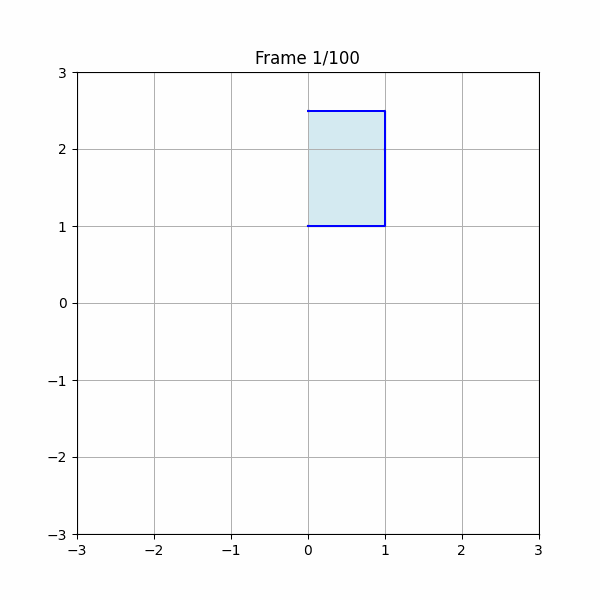

In [24]:
Image(filename='animation.gif')

## Cleaning the environment

In [25]:
import os

for filename in filenames:
    os.remove(filename)

print("Intermediate image files removed.")

Intermediate image files removed.
